In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation & EDA 

In [155]:
url = "https://raw.githubusercontent.com/Gaurava-15/Rawfiles/refs/heads/main/insurance.csv"
df = pd.read_csv(url)

In [33]:
print("🔍 First 5 rows of the dataset:")
df.head()

🔍 First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
print("\n📐 Data Types and Non-null Counts:")
df.info()


📐 Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
print("\n📊 Statistical Summary:")
df.describe()


📊 Statistical Summary:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [27]:
print("\n🧹 Missing Values:")
df.isnull().sum()


🧹 Missing Values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
print('Checking Duplicate value:')
df.duplicated().sum()

Checking Duplicate value:


1

In [55]:
df.shape

(1338, 7)

In [59]:
#'Removing Duplicate value:'
df = df.drop_duplicates()

## Exploratory Data Analysis (EDA)

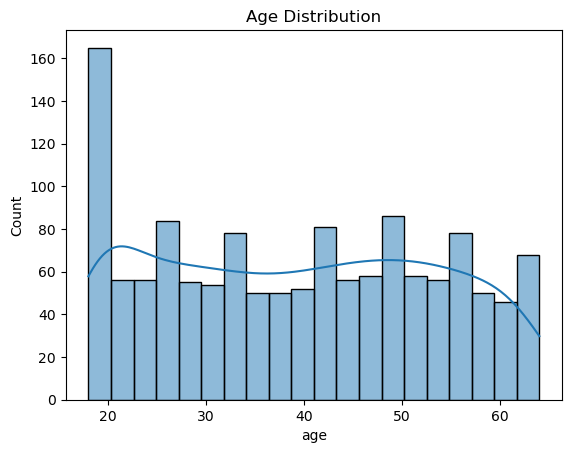

In [61]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

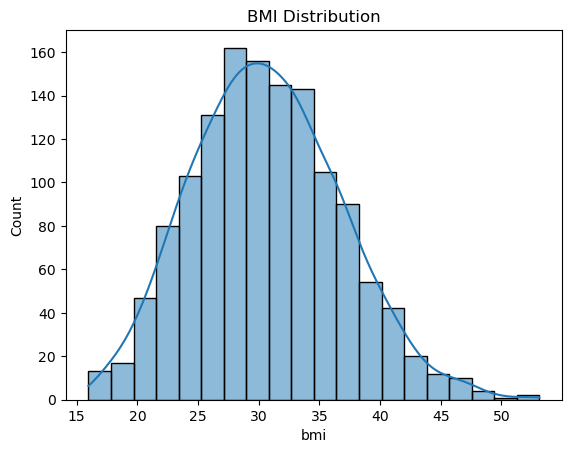

In [63]:
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.show()

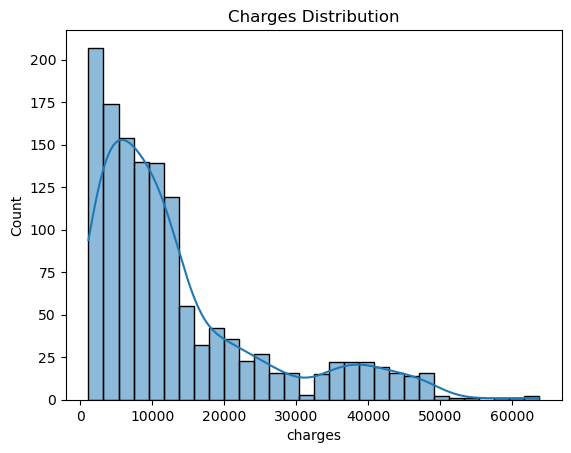

In [65]:
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Charges Distribution')
plt.show()

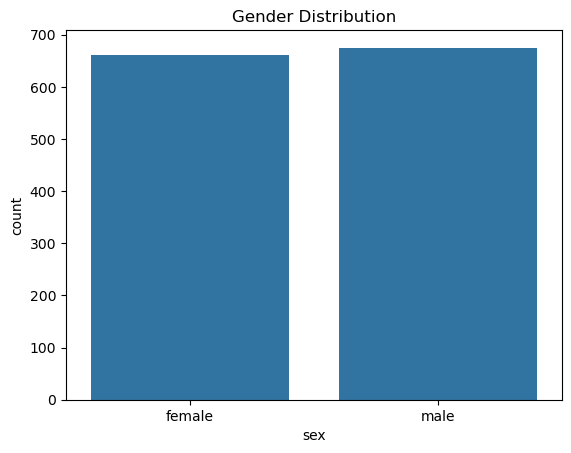

In [135]:
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()


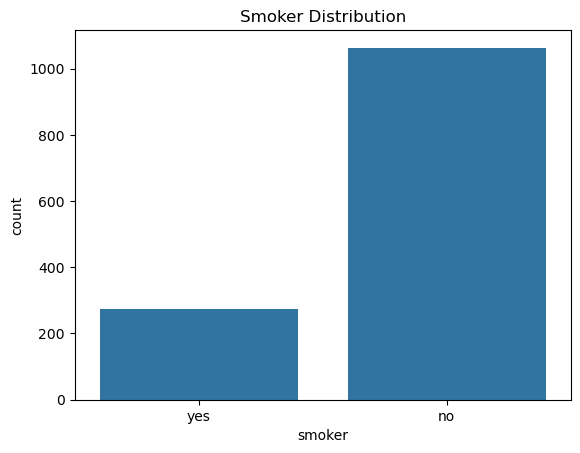

In [133]:
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()


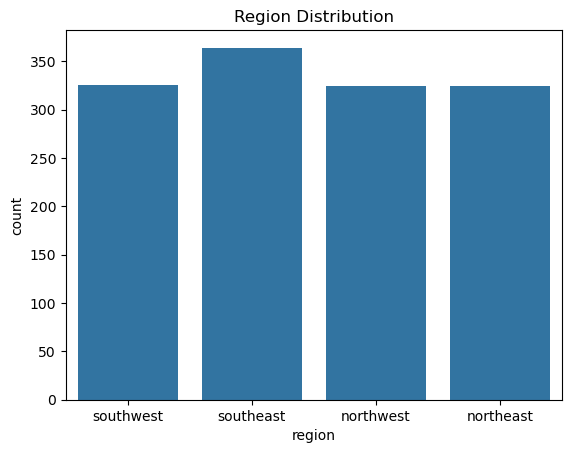

In [137]:
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()


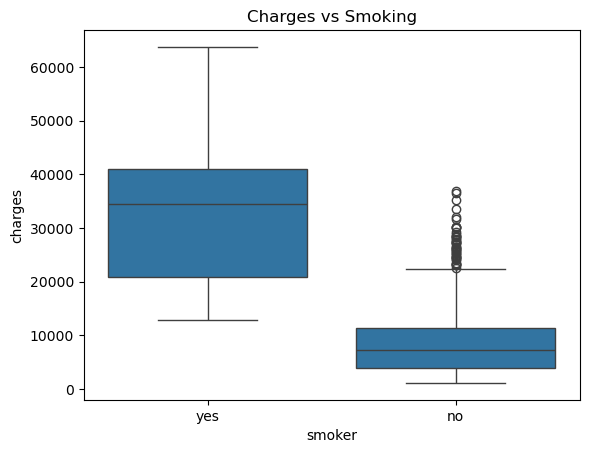

In [139]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges vs Smoking')
plt.show()


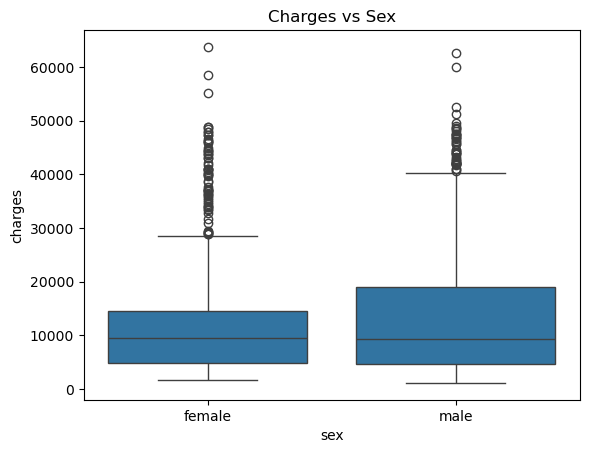

In [141]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges vs Sex')
plt.show()


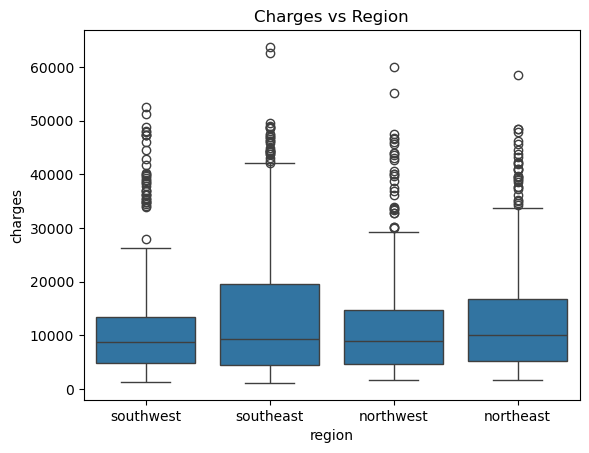

In [143]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges vs Region')
plt.show()


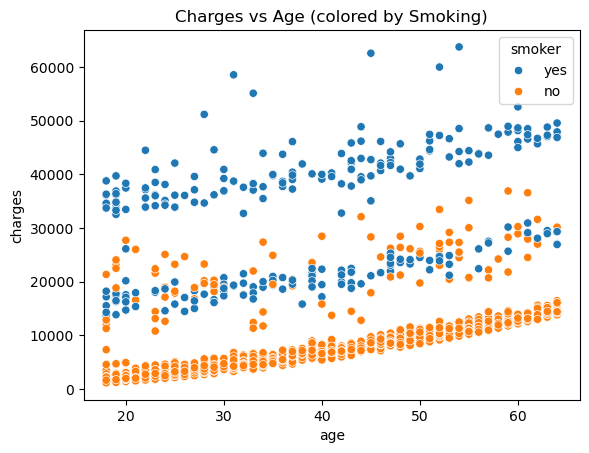

In [145]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs Age (colored by Smoking)')
plt.show()


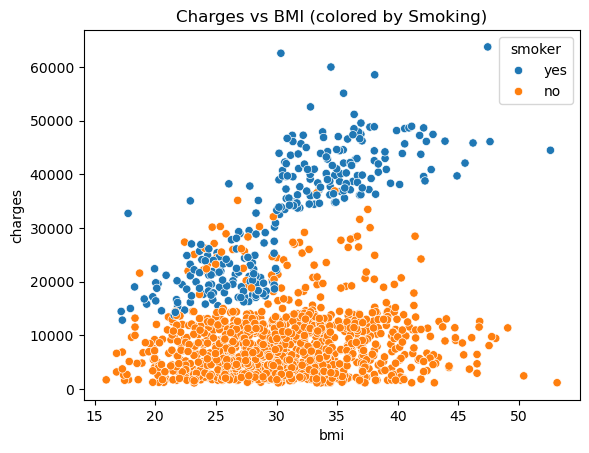

In [147]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs BMI (colored by Smoking)')
plt.show()


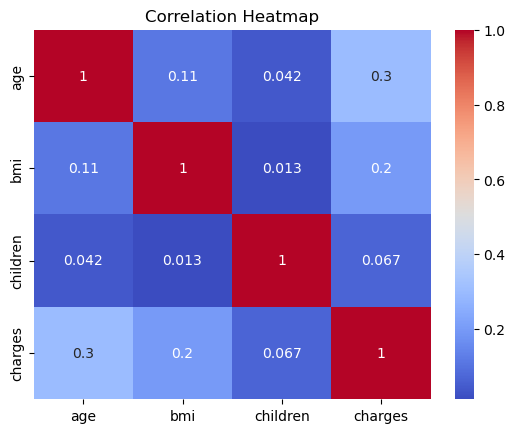

In [71]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##  Data Preprocessing & Feature Engineering

In [74]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [203]:
df_encoded.shape

(1337, 9)

In [82]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

## Train-Test Split

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (1069, 8)
Test set size: (268, 8)


## Model Training and Evaluation

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_error


In [175]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

Linear Regression Results:
MAE: 4177.045561036318
RMSE: 5956.342894363586
R² Score: 0.8069287081198013


In [191]:
print("Trainig Score: ",lr.score(X_train, y_train)*100, '%')
print("Testing Score: " ,lr.score(X_test, y_test)*100, '%')

Trainig Score:  72.99057809339075 %
Testing Score:  80.69287081198013 %


In [167]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 2637.9945481492537
RMSE: 4702.4462291546515
R² Score: 0.8796611113027272


In [189]:
print("Trainig Score: ",rf.score(X_train, y_train)*100, '%')
print("Testing Score: ",rf.score(X_test, y_test)*100, '%')

Trainig Score:  97.36580766745051 %
Testing Score:  87.96611113027272 %


In [169]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("RMSE:", root_mean_squared_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting Results:
MAE: 2517.4678305027105
RMSE: 4268.283017604774
R² Score: 0.9008563879867466


In [193]:
print("Trainig Score: ",gb.score(X_train, y_train)*100, '%')
print("Testing Score: ",gb.score(X_test, y_test)*100, '%')

Trainig Score:  89.16033853020491 %
Testing Score:  90.08563879867467 %


In [195]:
overall_scores  = pd.DataFrame({'Linear Regression':(lr.score(X_train, y_train)*100,
                                                     lr.score(X_test, y_test)*100),
                                'Random Forest':(rf.score(X_train, y_train)*100,
                                                 rf.score(X_test, y_test)*100),
                                'Gradient Boosting':(gb.score(X_train, y_train)*100,
                                                    gb.score(X_test, y_test)*100)
    })
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,72.990578,80.692871
Random Forest,97.365808,87.966111
Gradient Boosting,89.160339,90.085639


## Observations:

**Linear Regression:** Underfits the data, with a relatively low training score and limited ability to capture non-linear relationships.

**Random Forest Regressor:** High training accuracy with a noticeable drop on the test set, indicating slight overfitting.

**Gradient Boosting Regressor:** Best overall performance with strong generalization and a good balance between training and test scores, making it the most reliable model.